In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
* 텍스트 파일을 하나씩 읽어서 데이터프레임 생성
* 각 데이터프레임에 year 컬럼 추가
* 131개의 데이터프레임을 하나의 데이터프레임으로 병합(**concat**)

In [3]:
file_path = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob2010.txt'
df = pd.read_csv(file_path, header = None, names = ['names', 'gender', 'count'])
df['year'] = 2020
df.head()

,names,gender,count,year
0,Isabella,F,22731,2020
1,Sophia,F,20477,2020
2,Emma,F,17179,2020
3,Olivia,F,16860,2020
4,Ava,F,15300,2020


In [4]:
years = range(1880, 2011) #연도
col_names = ['name', 'gender', 'count'] #데이터프레임의 컬럼 이름들
yobs = [] #파일을 하나씩 읽어서 데이터프레임을 생성할 때마다 생성된 DF 를 append

for y in years:
    file_path = f'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob{y}.txt'
    df = pd.read_csv(file_path, header=None, names=col_names)
    df['year'] = y #데이터프레임에 파생변수 추가
    yobs.append(df) #완성된 데이터프레임을 리스트에 추가

print(len(yobs))

131


In [5]:
yob_df = pd.concat(yobs, axis = 0, ignore_index = True)

In [6]:
yob_df.head()

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [7]:
yob_df.shape

(1690784, 4)

In [8]:
# 첫번째 원소의 정보
yob_df.loc[0]

name      Mary
gender       F
count     7065
year      1880
Name: 0, dtype: object

# 시각화

## matplotlib 사용시

### 연도별 신생아 숫자

In [11]:
# 연도별 부분집합에서 count 컬럼의 값의 합계(sum)의 리스트
births_by_year = []

for y in years:
    sub_df = yob_df[yob_df['year'] == y]
    births = sub_df['count'].sum()
    births_by_year.append(births)
# list comprehension : births_by_year=[yob_df[yob_df['year']==y]['count'].sum() for y in years]

s = pd.Series(data = births_by_year, index = years)
s

1880     201486
1881     192703
1882     221538
1883     216954
1884     243466
         ...   
2006    3946702
2007    3986130
2008    3915955
2009    3801002
2010    3657392
Length: 131, dtype: int64

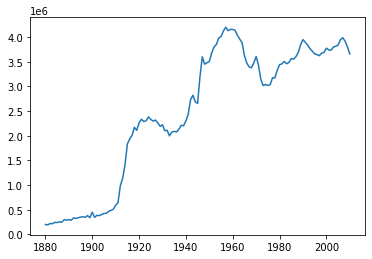

In [13]:
plt.plot(s.index, s.values)
plt.show()

### 연도별, 성별 신생아 숫자 시각화

In [14]:
male_births = [yob_df[(yob_df['gender'] == 'M') & (yob_df['year'] == y)]['count'].sum() for y in years]
female_births=[yob_df[(yob_df['gender'] == 'F') & (yob_df['year'] == y)]['count'].sum() for y in years]

s1 = pd.Series(data = male_births, index = years)
s2 = pd.Series(data = female_births, index = years)

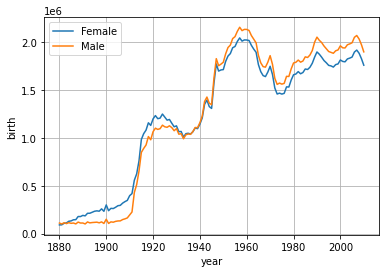

In [15]:
plt.plot(s2.index, s2.values, label = 'Female')
plt.plot(s1.index, s1.values, label = 'Male')

plt.legend()
plt.xlabel('year')
plt.ylabel('birth')
plt.grid()
plt.show()

## seaborn 사용 시

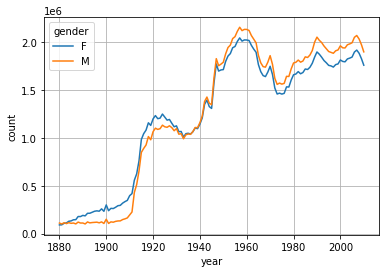

In [16]:
sns.lineplot(data = yob_df, x = 'year', y = 'count', hue = 'gender',
            estimator = 'sum', err_style = None)
plt.grid()
plt.show()